Demo of spectral clustering on Two Moons toy example. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.datasets

In [ ]:
# generate a mixture model using sklearn's data generation function

N = 128 # total number of samples 

# X is our inoput data. The Y's are only used for plotting and assessment of accuracy 
X, Y = skl.datasets.make_blobs(n_samples=N, centers=[[0, 0], [.8,.3], [-0.3, -0.15]], cluster_std= [.15, 0.1, 0.05], n_features=2,random_state=0)

Text(0.5, 1.0, 'Input (Unlabelled) data')

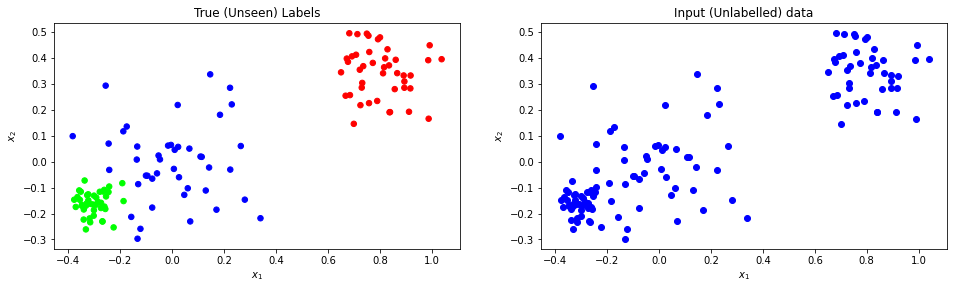

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], c=Y, s= 30, cmap='brg')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('True (Unseen) Labels')

ax[1].scatter(X[:,0], X[:,1], color='b')
ax[1].set_aspect('equal')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_title('Input (Unlabelled) data')

In [ ]:
# compute the weight matrix W for the vertices of our graph 

def eta(tt, rr):

  val = tt <= rr 

  return val.astype(float)



In [ ]:
import scipy.spatial 

dist = scipy.spatial.distance_matrix( X, X, p =2)

r = 0.2

W = eta( dist, r)

In [ ]:
# visualize the graph using NetworkX

import networkx as nx

G = nx.Graph()

for i in range(N):
  for j in range(N):
    if i != j and W[i,j] != 0 :
      G.add_edge(i, j, weight=W[i,j])

Text(0.5, 1.0, 'Proximity Graph')

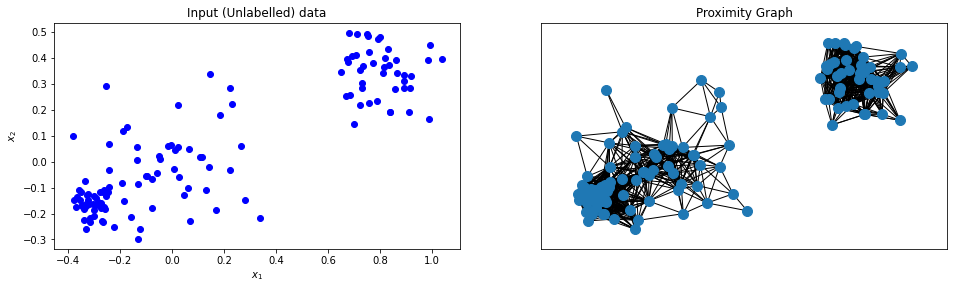

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].scatter(X[:,0], X[:,1], color='b')
ax[0].set_aspect('equal')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[0].set_title('Input (Unlabelled) data')



nx.draw_networkx_nodes(G, X, node_size=100, ax = ax[1])
nx.draw_networkx_edges(G, X, ax = ax[1])
ax[1].set_aspect('equal')
ax[1].set_title('Proximity Graph')